## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Data" / "faces.csv"
# This file might end up somewhere else
con_file = path.parent / "Data" / "conlist.csv"

X = np.loadtxt(data_file, delimiter =",")
conlist = np.loadtxt(con_file, delimiter = ",").astype(int)
# Conlist is stupid and made with "only" matlab in mind, retract 1 to start from 0
conlist[:,0:2] -= 1

n, p = np.shape(X)

## Helper functions

In [3]:
def drawShape(mu, conlist, title="Mean face"):
   # Matlabs drawshape is a strange un-intuative function, here's how you do it
   for i in range(np.size(conlist, axis = 0)): # How many different lines exist in the data (7)
       xpoints = mu[conlist[i,0]:conlist[i,1]+1]
       ypoints = mu[conlist[i,0] +  58:conlist[i,1] + 59]
       
       if conlist[i][2] == 1: # If it is a closed loop
           xpoints = np.append(xpoints, xpoints[0])
           ypoints = np.append(ypoints, ypoints[0])
       plt.plot(xpoints, ypoints, color = "b")
   plt.title(title)
   plt.axis('equal')
   plt.show()

In [4]:
def drawShapeSubPlot(mu, conlist, ax, label, color = "b"):
    # Matlabs drawshape is a strange un-intuative function, here's how you do it
    for i in range(np.size(conlist, axis = 0)): # How many different lines exist in the data (7)
        xpoints = mu[conlist[i,0]:conlist[i,1]+1]
        ypoints = mu[conlist[i,0] +  58:conlist[i,1] + 59]
        
        if conlist[i][2] == 1: # If it is a closed loop
            xpoints = np.append(xpoints, xpoints[0]) 
            ypoints = np.append(ypoints, ypoints[0])
        ax.plot(xpoints, ypoints, color = color, label = label)
    ax.axis('equal')

### 1 Apply Principal Component Analysis (PCA) to the face data set in faces.mat

> b) Compute the mean shape and center the data. Plot the mean shape using drawShape

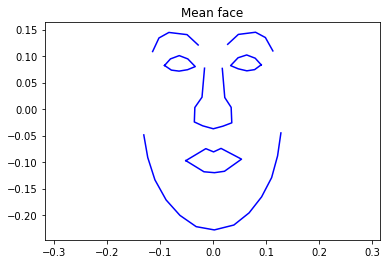

In [5]:
mu = np.mean(X, axis = 0)

# center the data
Xc = X - np.ones((n,1))*mu

# call drawShape with the mean and conlist to plot the mean face
drawShape(mu, conlist)

 >  c) Compute a principal component analysis of the data. Try using both an eigenvalue decomposition (EVD) and a singular value decomposition (SVD). Remember that the EVD is computed on the correlation or covariance matrix and the SVD on the data matrix itself.

In [6]:
# Compute PCA as an eigenvalue analysis of the covariance matrix
Eval, Evec = np.linalg.eig(np.cov(X.T))

# Sort while still keeping the imaginary part, therefor lexicographic sorting
# Also, descending sort
sortIndex = np.argsort(Eval)[::-1] 

Eval = Eval[sortIndex].astype(np.float64) # Away with imaginary part (~0) and order
Evec = Evec[:, sortIndex].astype(np.float64)

# Discard strictly none-positive eigenvalues modes
Eval = Eval[np.where(Eval > 1e-9)]
Evec = Evec[:, 0: len(Eval)]

U, d, V = np.linalg.svd(Xc) #Computes U @ diag(d) @ V. So remember to take the complex conjugate of V
d = d[np.where(d > 1e-9)]
k = len(d)
U = U[:,:k]
V = V.T[:,:k]

print('Difference in eigenvalues (variances) is {}.'.format(np.linalg.norm(Eval - d**2/n)))
print('Difference in eigenvalues (variances) is {}.'.format(np.linalg.norm(Evec**2 - V**2)))

Difference in eigenvalues (variances) is 8.285059417712891e-05.
Difference in eigenvalues (variances) is 2.491940071737798e-14.


<ipython-input-6-22f8ef82d6b4>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  Eval = Eval[sortIndex].astype(np.float64) # Away with imaginary part (~0) and order
<ipython-input-6-22f8ef82d6b4>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  Evec = Evec[:, sortIndex].astype(np.float64)


> d) Plot the first mode of variation. This will provide a view of the most important variation in the data set.

<ipython-input-7-b1c382054c71>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


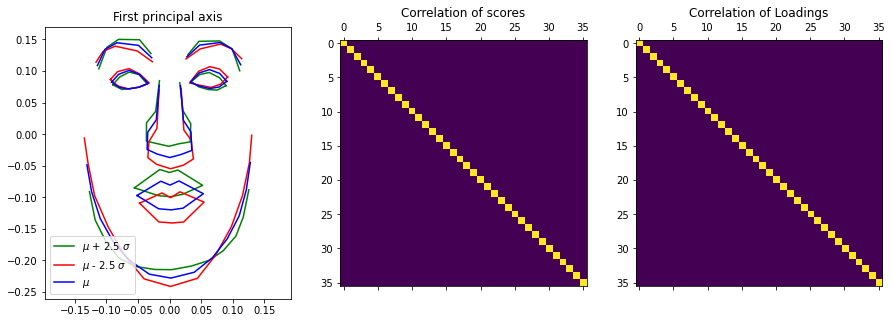

In [7]:
# Assign PCA
L = V # the loading
S = np.matmul(U, np.diag(d)) # The scores
sigma2 = d ** 2 / n

fig, ax = plt.subplots(1,3, figsize=(15,5))
drawShapeSubPlot(mu.T + 2.5 * np.sqrt(sigma2[0]) * L[:, 0], conlist, ax[0], "$\mu$ + 2.5 $\sigma$" , "g")
drawShapeSubPlot(mu.T - 2.5 * np.sqrt(sigma2[0]) * L[:, 0], conlist, ax[0], "$\mu$ - 2.5 $\sigma$", "r")
drawShapeSubPlot(mu, conlist, ax[0], "$\mu$" , "b")

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys())
ax[0].set_title("First principal axis")

ax[1].matshow(np.abs(np.corrcoef(S, rowvar = False)))
ax[1].set_title("Correlation of scores")

ax[2].matshow(np.abs(np.corrcoef(L, rowvar = False)))
ax[2].set_title("Correlation of Loadings")
fig.show()

> e) Explore the first few modes of variation using the line below

Use the sliders in the UI to make the first 6 modes affect the mean face

Make sure that you have the following file structure:


Data:

    -> ShapeInspectorGUI.py
    -> shapeinspector.py
Python:

    -> faces.csv
Matlab

    -> conlist.scv

In [8]:
!python ShapeInspectorGUI.py